# 📨 Lead Scoring Case Study

## Problem Statement

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%

## Approach

- Data importing/loading
- Data preparation
    - encoding categorical variable
    - handling null values
- EDA
    - Univariate Analysis
    - Outlier detection
    - Checking data imbalance
- Dummy Variable Creation
- Test Train Split
- Feature Scaling
- Correlations
- Model Building
    - Feature Selection Using RFE
    - Model Improvisation
- Model Finalisation
- Model Evaluation

## Importing Libraries

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer

import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

## Step 1 - Data Loading

In [44]:
lead_df = pd.read_csv("Leads.csv")
pd.set_option('display.max_columns',None)
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


## Step - 2: Inspecting Dataframe

In [45]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [47]:
lead_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


Checking the missing Data percentage

In [48]:
# Missing value percentage
round(lead_df.isnull().sum()/lead_df.shape[0],2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.00
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      0.01
Total Time Spent on Website                      0.00
Page Views Per Visit                             0.01
Last Activity                                    0.01
Country                                          0.27
Specialization                                   0.16
How did you hear about X Education               0.24
What is your current occupation                  0.29
What matters most to you in choosing a course    0.29
Search                                           0.00
Magazine                                         0.00
Newspaper Article           

Looking at the dataset, there are couple of things to be done
- Encoding categorical values (eg, Do not email, do not call etc)
- Missing value handling
- There are values called Select (which is the default value while selecting a value from select form element), need to convert that to NaN
- Droping column having more than

## Step 3: Data Preparation

<b> Converting Yes/No to 1/0s</b>

In [50]:
# Encoding the variables with yes/no labels
features_yes_no_values = ["Do Not Email","Do Not Call","Search","Magazine","Newspaper Article","X Education Forums","Newspaper","Digital Advertisement","Through Recommendations","Receive More Updates About Our Courses","Update me on Supply Chain Content","Get updates on DM Content","I agree to pay the amount through cheque","A free copy of Mastering The Interview"]
for feature in features_yes_no_values:
    lead_df[feature] = lead_df[feature].apply(lambda x: 1 if x == 'Yes' else 0)
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Interested in other courses,Low in Relevance,0,0,Select,Select,02.Medium,02.Medium,15.0,15.0,0,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,NaN,0,0,Select,Select,02.Medium,02.Medium,15.0,15.0,0,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,0,0,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,Not Sure,0,0,Select,Mumbai,02.Medium,01.High,13.0,17.0,0,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,Select,Mumbai,02.Medium,01.High,15.0,18.0,0,0,Modified


<b> Converting SELECTs into NaNs</b>

In [52]:
#Listing the categorical variables 
lead_df.select_dtypes(include='object').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 16 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Prospect ID                                    9240 non-null   object
 1   Lead Origin                                    9240 non-null   object
 2   Lead Source                                    9204 non-null   object
 3   Last Activity                                  9137 non-null   object
 4   Country                                        6779 non-null   object
 5   Specialization                                 7802 non-null   object
 6   How did you hear about X Education             7033 non-null   object
 7   What is your current occupation                6550 non-null   object
 8   What matters most to you in choosing a course  6531 non-null   object
 9   Tags                                           5887 non-null   

Lets check the labels for categorical column or values above

In [54]:
#checking labels for categorical columns
for col in lead_df.iloc[:,1:].select_dtypes(include="object").columns:
    print("xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx")
    print(col)
    print("-----------------------")
    print(lead_df[col].value_counts(normalize=True))
    print("xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx\n")

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Lead Origin
-----------------------
Landing Page Submission    0.528788
API                        0.387446
Lead Add Form              0.077706
Lead Import                0.005952
Quick Add Form             0.000108
Name: Lead Origin, dtype: float64
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Lead Source
-----------------------
Google               0.311604
Direct Traffic       0.276293
Olark Chat           0.190678
Organic Search       0.125380
Reference            0.058018
Welingak Website     0.015428
Referral Sites       0.013581
Facebook             0.005976
bing                 0.000652
google               0.000543
Click2call           0.000435
Press_Release        0.000217
Social Media         0.000217
Live Chat            0.000217
youtubechannel       0.000109
testone              0.000109
Pay per Click Ads    0.000109
welearnblog_Home     0.000109
WeLearn              0.000109
b

In [55]:
#converting all the selects to NaN as the user didnt select any option from the list and "Select" is good as NaN in our case
lead_df = lead_df.replace('Select',np.nan)

In [56]:
# Missing value percentage
round(lead_df.isnull().sum()/lead_df.shape[0],2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.00
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      0.01
Total Time Spent on Website                      0.00
Page Views Per Visit                             0.01
Last Activity                                    0.01
Country                                          0.27
Specialization                                   0.37
How did you hear about X Education               0.78
What is your current occupation                  0.29
What matters most to you in choosing a course    0.29
Search                                           0.00
Magazine                                         0.00
Newspaper Article           

<b> Handling Missing Values for numerical columns</b>

We are going to drop all the columns having more than 70% of missing values for now

In [63]:
col_to_drop = lead_df.loc[:,list(round(lead_df.isnull().sum()/lead_df.shape[0],2) >= 0.70)].columns

In [64]:
#Drop columsn with more than 70% missing values
lead_df = lead_df.drop(col_to_drop,1)

In [65]:
# Missing value percentage
round(lead_df.isnull().sum()/lead_df.shape[0],2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.00
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      0.01
Total Time Spent on Website                      0.00
Page Views Per Visit                             0.01
Last Activity                                    0.01
Country                                          0.27
Specialization                                   0.37
What is your current occupation                  0.29
What matters most to you in choosing a course    0.29
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums          

For "Lead Quality" column, as it directly depends upon the employee of the company (X education) whether that employee belongs to sales team or marketing team. This is something not directly coming from customer. Therefore we can simply assume that for all the NaN as "Not Sure". 

In [66]:
#replace NaN to "Not Sure" for Lead Quality column
lead_df['Lead Quality'] = lead_df['Lead Quality'].replace(np.nan,"Not Sure")

For Asymmetrique Activity Index, Asymmetrique Profile Index, Asymmetrique Activity Score, Asymmetrique Activity Score there are above 40% missing values. Its best to drop these feature as will leads to bias and class imbalance

In [67]:
lead_df = lead_df.drop(["Asymmetrique Activity Index","Asymmetrique Profile Index","Asymmetrique Activity Score","Asymmetrique Profile Score"],1)

In [68]:
# Missing value percentage
round(lead_df.isnull().sum()/lead_df.shape[0],2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.00
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      0.01
Total Time Spent on Website                      0.00
Page Views Per Visit                             0.01
Last Activity                                    0.01
Country                                          0.27
Specialization                                   0.37
What is your current occupation                  0.29
What matters most to you in choosing a course    0.29
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums          

In [69]:
#we can impute the Mumbai into all the NULLs as most of the values belong to Mumbai
lead_df['City'] = lead_df["City"].replace(np.nan, 'Mumbai')

# for "Specialization" we will impute NaN with Other_Specialization
lead_df['Specialization'] = lead_df['Specialization'].replace(np.nan, "Other_Specialization")

# for Tags column most of the values are "Will revert after reading the email" around 35%, therefore imputing NaN with "Will revert after reading the email"
lead_df['Tags'] = lead_df["Tags"].replace(np.nan, 'Will revert after reading the email')

#for What matters most to you in choosing a course column most of the values is of "Better Career Prospects" which almost touching 100%, therefore imputing NaN with it
lead_df['What matters most to you in choosing a course'] = lead_df["What matters most to you in choosing a course"].replace(np.nan, 'Better Career Prospects')

# for "What is your current occupation" column most the values is of "Unemployed" (35%), hence imputing NaN with "Unemployed"
lead_df['What is your current occupation'] = lead_df["What is your current occupation"].replace(np.nan, 'Unemployed')

# for "Country" column around 95% values are "India", hence imputing NaN with India
lead_df['Country'] = lead_df["Country"].replace(np.nan, 'India')

In [70]:
# Missing value percentage
round(lead_df.isnull().sum()/lead_df.shape[0],2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.00
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      0.01
Total Time Spent on Website                      0.00
Page Views Per Visit                             0.01
Last Activity                                    0.01
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums          

In [88]:
# for "TotalVisits", "Page Views Per Visit" and "Last Activity" missing values are around 1%, hence for these we can safely drop those rows
lead_df.dropna(inplace=True)
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,India,Other_Specialization,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Interested in other courses,Low in Relevance,0,0,Mumbai,0,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,India,Other_Specialization,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,Not Sure,0,0,Mumbai,0,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,Mumbai,0,0,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,Not Sure,0,0,Mumbai,0,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,India,Other_Specialization,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,Mumbai,0,0,Modified


Lets check the Lead Source possible values

In [90]:
lead_df["Lead Source"].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

There is two value of google one with Google and other google, lets standardize those

In [92]:
lead_df['Lead Source'].replace("google","Google",inplace=True)
lead_df["Lead Source"].value_counts()

Google               2873
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
Pay per Click Ads       1
blog                    1
WeLearn                 1
welearnblog_Home        1
youtubechannel          1
testone                 1
NC_EDM                  1
Name: Lead Source, dtype: int64

## Step 4: Exploratory Data Analysis

First lets check if we have class imbalance problem with our target variable

In [93]:
lead_df["Converted"].value_counts(normalize=True)

0    0.621446
1    0.378554
Name: Converted, dtype: float64

#### Insights
- as we can see we dont have noticeable class imbalance, therefore we can move ahead with our EDA

Lets see the convertion among "Lead Origin" column 

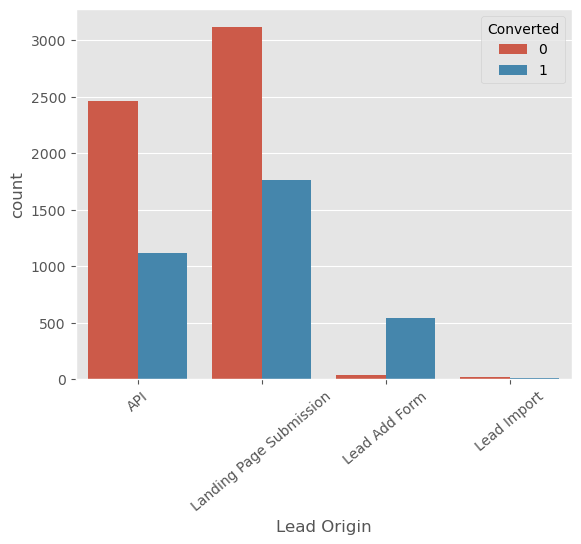

In [94]:
sns.countplot(x=lead_df["Lead Origin"],hue=lead_df["Converted"])
plt.xticks(rotation=40);
    

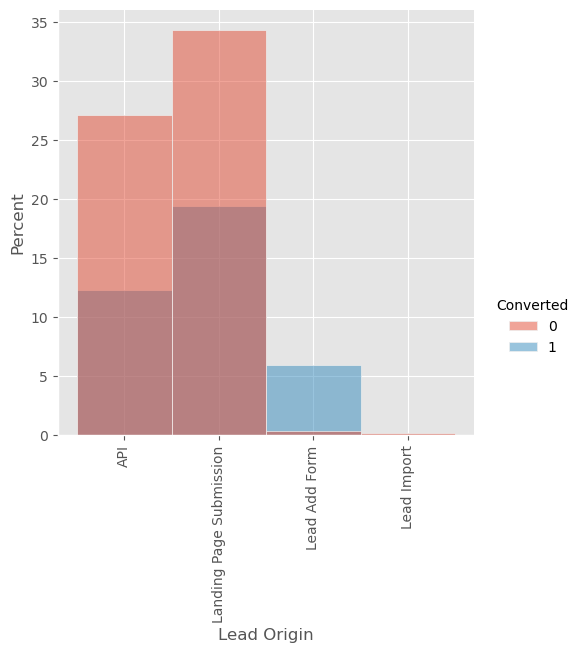

In [100]:
sns.displot( x=lead_df["Lead Origin"], stat='percent', hue=lead_df["Converted"])
plt.xticks(rotation=90);

#### Insights
- API and Landing Page Submission has less convertion rate (~13% and ~20%) but count of lead is quite noticeable
- For Lead Add Form, although the convertion is high but have poor lead count
- For Lead Import count as well as convertion rate is ignorable

<b>Focusing on API and Landing Page Submission might lead to better convertion rate, also Lead Add Form is also seems to be a good candidate for consideration.</b>

Lets see the convertion among "Lead Source"

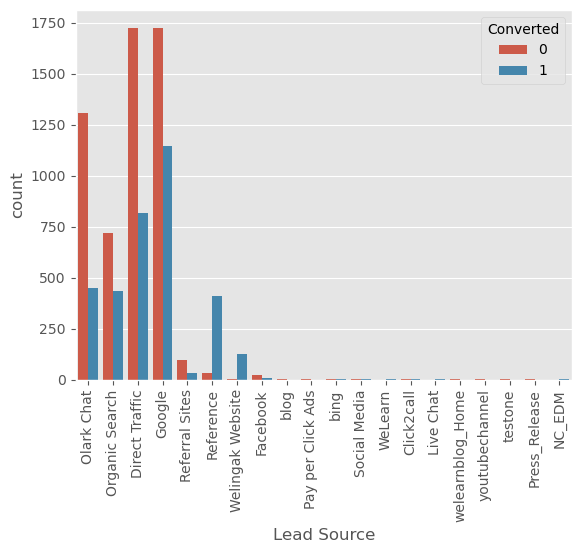

In [96]:
sns.countplot(x=lead_df["Lead Source"],hue=lead_df["Converted"])
plt.xticks(rotation=90);

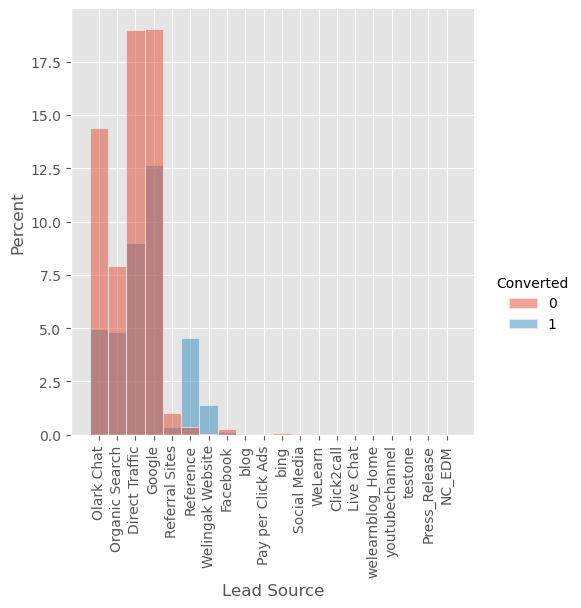

In [99]:
sns.displot( x=lead_df["Lead Source"], stat='percent', hue=lead_df["Converted"])
plt.xticks(rotation=90);

If we notice columns such as "blog", "Pay per Click Ads", "bing","Social Media", "WeLearn","Click2call","Live Chat","welearnblog_Home","youtubechannel","testone","Press_Release","NC_EDM" etc have unnoticeable count for lead. Moreover they are not key player when it come to Lead Source. Lets club them together under "Other_Lead_Source"

In [101]:
lead_df['Lead Source'] = lead_df['Lead Source'].replace(["blog", "Pay per Click Ads", "bing","Social Media", "WeLearn","Click2call","Live Chat","welearnblog_Home","youtubechannel","testone","Press_Release","NC_EDM"],"Other_Lead_Source")

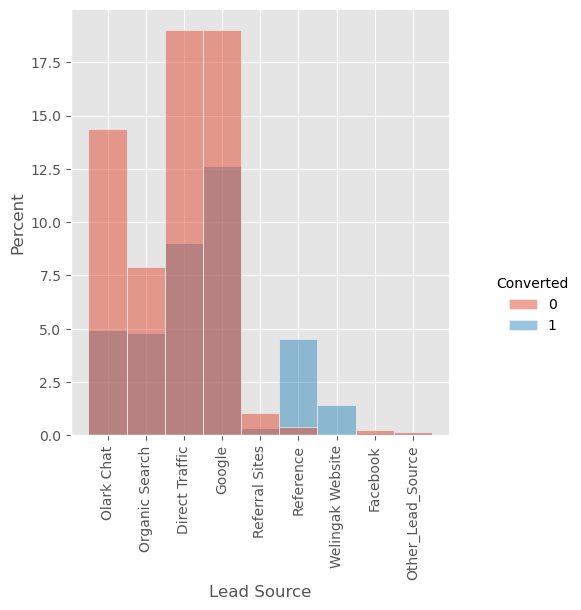

In [102]:
#plotting Lead Source again
sns.displot( x=lead_df["Lead Source"], stat='percent', hue=lead_df["Converted"])
plt.xticks(rotation=90);

#### Insights
- As noticeable, count from Google, Direct Traffic is high
- Conversion rate of Reference and Welingak Website is maximum even though having poor count lead

<b>Since, lead count of Google, Direct Traffic, Olark Chat, and Organic search is high. Hence more focus is required in regards of conversion rate. Also Reference and Welingak Website have pretty good conversion, more attention is required to increase its count.</b>

Lets analyse the "Total Visits" and "Total Time Spent on Website", because these are numerical variable using box plot for them

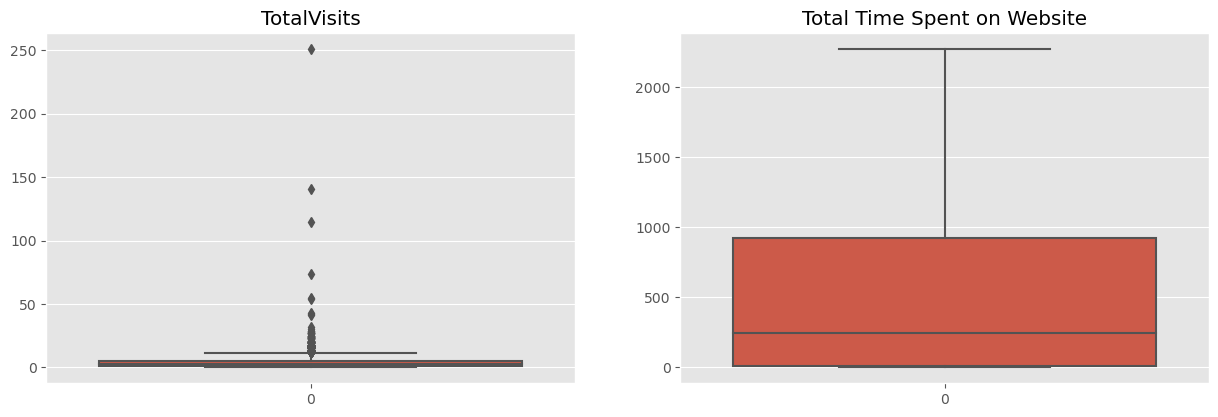

In [104]:
fig = plt.subplots(figsize=(15,10))
for i, feature in enumerate(["TotalVisits","Total Time Spent on Website"]):
    plt.subplot(2,2,i+1)
    sns.boxplot(lead_df[feature])
    plt.title(feature)
    
plt.show()

There are lots of outliers in the TotalVisits column, lets cap them to 95 percentile

In [108]:
value_at_95_percentile = lead_df["TotalVisits"].quantile(0.95)

In [109]:
lead_df["TotalVisits"][lead_df["TotalVisits"] >= value_at_95_percentile ] = value_at_95_percentile

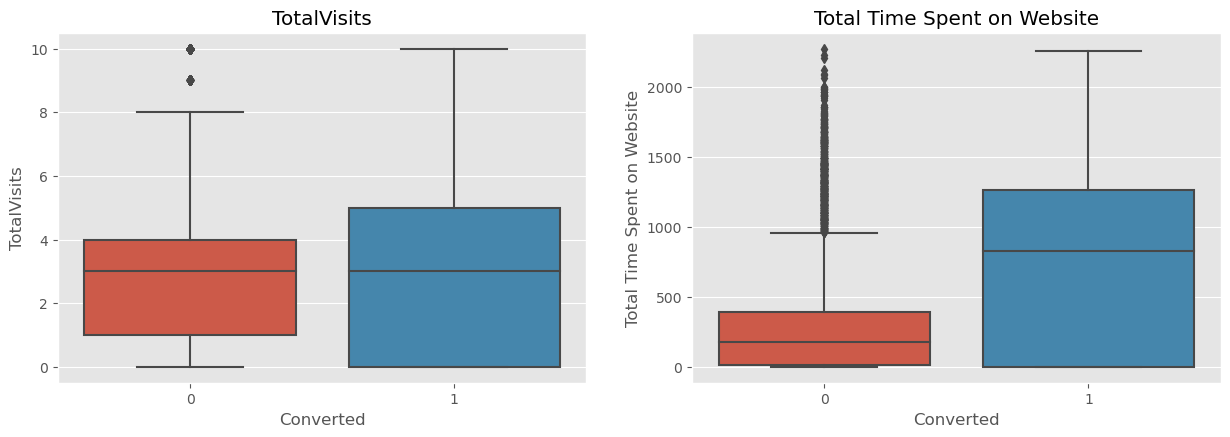

In [111]:
fig = plt.subplots(figsize=(15,10))
for i, feature in enumerate(["TotalVisits","Total Time Spent on Website"]):
    plt.subplot(2,2,i+1)
    sns.boxplot(data = lead_df, y = feature, x="Converted")
    plt.title(feature)
    
plt.show()

#### Insights
- For TotalVisits, the conversion and non-conversion are same (median), therefore nothing important to conclude over here
- For Total Time Spent on Website, User spending more time on the website are more likely to get converted

<b>Website could be made more attractive, with fun-quality content and interactive component might to increase the time spent by users on website. </b>

Lets analyse the Last Activity column

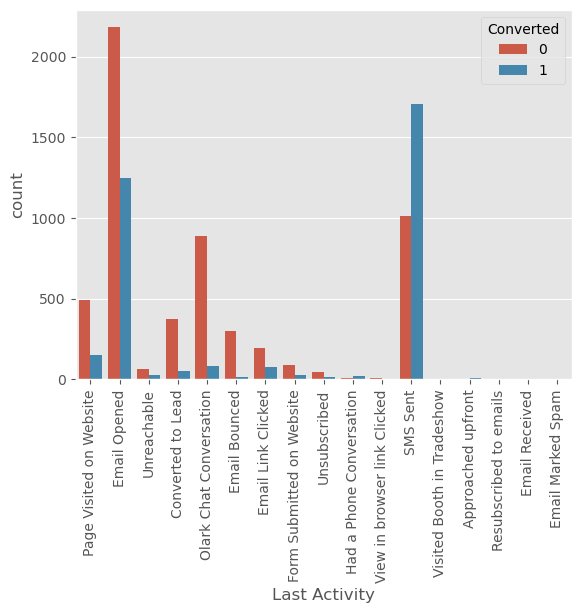

In [112]:
#plotting the last activity column
sns.countplot(x="Last Activity", hue="Converted", data=lead_df)
plt.xticks(rotation=90)
plt.show()

As we notice there are low count categories lets club them under "Other Activity"

In [113]:
# grouping low count categories to common category "Other Activity"
lead_df["Last Activity"] = lead_df["Last Activity"].replace(["Had a Phone Conversation","View in browser link Clicked",
                                                             "Visited Booth in Tradeshow","Approached upfront","Resubscribed to emails",
                                                             "Email Received","Email Marked Spam"],"Other Activity")

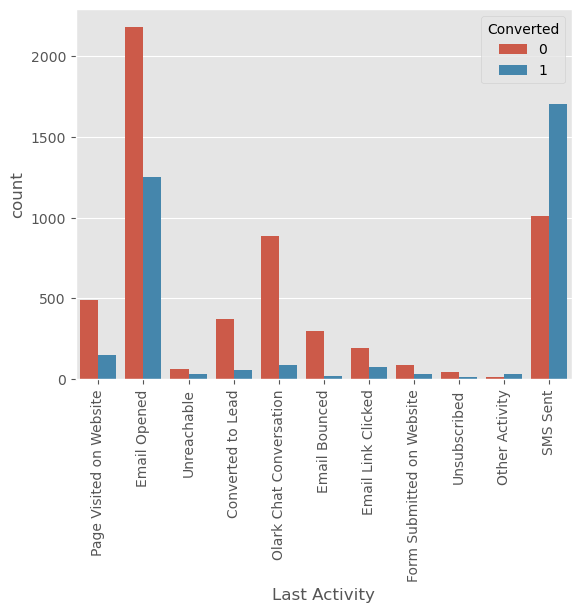

In [114]:
#plotting the last activity column again
sns.countplot(x="Last Activity", hue="Converted", data=lead_df)
plt.xticks(rotation=90)
plt.show()

#### Insights
- The count for category "Email Opened" is maximum
- the coversion rate of category "SMS Sent" is maximum

<b>We should focus on increasing the count of the leads having last activity as "SMS Sent". Moreover, lead having last activity as "Email Opened" have high number of count, therefore we should focus on those leads and try increase there conversion rate by making call to them</b>